In [ ]:
import numpy as np
import polars as pl
import os
print(os.listdir("/content/dados_empréstimo"))
import matplotlib.pyplot as plt
import seaborn as sns
#o %matplotlib inline fala para o notebook gerar os gráficos diretamente dentro do notebook
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

['dados_clube_emprestimo.csv']


In [ ]:
df = pl.read_csv('/content/dados_empréstimo/dados_clube_emprestimo.csv')

In [ ]:
#Teste com pandas para comparar os valores
# import pandas as pd
# emprestimo = pd.read_csv('/content/dados_empréstimo/dados_clube_emprestimo.csv')
# emprestimo.nsmallest(5, 'int.rate')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
453,1,debt_consolidation,0.06,467.45,11.042922,15.28,687,4652.041667,26044,34.5,3,0,0,0
1031,1,credit_card,0.06,231.03,11.184421,14.07,672,2910.000000,15885,46.9,1,1,0,0
1400,1,debt_consolidation,0.06,216.38,10.239960,12.09,667,2550.000000,14320,67.5,1,0,0,0
1796,1,credit_card,0.06,194.70,10.434116,17.12,742,2430.041667,7005,40.0,0,0,0,0
2738,1,educational,0.06,91.27,9.793449,5.69,727,4320.000000,859,10.7,0,0,0,0


In [ ]:
df.sort(by='int.rate').head(5)

credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
i64,str,f64,f64,f64,f64,i64,f64,i64,f64,i64,i64,i64,i64
1,"""debt_consolida…",0.06,467.45,11.042922,15.28,687,4652.041667,26044,34.5,3,0,0,0
1,"""credit_card""",0.06,231.03,11.184421,14.07,672,2910.0,15885,46.9,1,1,0,0
1,"""debt_consolida…",0.06,216.38,10.23996,12.09,667,2550.0,14320,67.5,1,0,0,0
1,"""credit_card""",0.06,194.7,10.434116,17.12,742,2430.041667,7005,40.0,0,0,0,0
1,"""educational""",0.06,91.27,9.793449,5.69,727,4320.0,859,10.7,0,0,0,0


In [ ]:
#Com o Polars para pegar os valores maiores na coluna int.rate, precisei usar o 'descending' e não o 'reverse'
df.sort(by='int.rate', descending=True).head(5)

credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
i64,str,f64,f64,f64,f64,i64,f64,i64,f64,i64,i64,i64,i64
0,"""home_improveme…",0.2164,729.7,11.877569,8.63,667,8280.041667,55442,66.9,9,0,1,1
0,"""all_other""",0.2164,551.08,11.0021,24.06,662,1800.0,16441,49.8,9,0,0,1
1,"""debt_consolida…",0.2121,746.24,11.736069,19.87,662,7920.0,90063,79.6,1,0,0,1
1,"""small_business…",0.2121,491.2,11.957611,10.45,667,3538.0,14718,40.4,1,0,0,0
1,"""small_business…",0.2121,755.69,11.24896,5.72,672,1440.0,500,83.3,1,0,0,0


In [ ]:
#df.info no polars = df.schema
df.schema

OrderedDict([('credit.policy', Int64),
             ('purpose', Utf8),
             ('int.rate', Float64),
             ('installment', Float64),
             ('log.annual.inc', Float64),
             ('dti', Float64),
             ('fico', Int64),
             ('days.with.cr.line', Float64),
             ('revol.bal', Int64),
             ('revol.util', Float64),
             ('inq.last.6mths', Int64),
             ('delinq.2yrs', Int64),
             ('pub.rec', Int64),
             ('not.fully.paid', Int64)])

In [ ]:
df.describe()

describe,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",9578.0,"""9578""",9578.0,9578.0,9578.0,9578.0,9578.0,9578.0,9578.0,9578.0,9578.0,9578.0,9578.0,9578.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.80497,null,0.12264,319.089413,10.932117,12.606679,710.846314,4560.767197,16913.963876,46.799236,1.577469,0.163708,0.062122,0.160054
"""std""",0.396245,null,0.026847,207.071301,0.614813,6.88397,37.970537,2496.930377,33756.189557,29.014417,2.200245,0.546215,0.262126,0.366676
"""min""",0.0,"""all_other""",0.06,15.67,7.547502,0.0,612.0,178.958333,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",1.0,null,0.1039,163.77,10.558414,7.21,682.0,2820.0,3187.0,22.6,0.0,0.0,0.0,0.0
"""50%""",1.0,null,0.1221,268.95,10.929529,12.67,707.0,4139.958333,8596.0,46.3,1.0,0.0,0.0,0.0
"""75%""",1.0,null,0.1407,432.9,11.29178,17.95,737.0,5730.0,18252.0,70.9,2.0,0.0,0.0,0.0
"""max""",1.0,"""small_business…",0.2164,940.14,14.528354,29.96,827.0,17639.95833,1.207359e6,119.0,33.0,13.0,5.0,1.0


In [ ]:
#Mesma função do df.head
df.limit(5)

credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
i64,str,f64,f64,f64,f64,i64,f64,i64,f64,i64,i64,i64,i64
1,"""debt_consolida…",0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,"""credit_card""",0.1071,228.22,11.082143,14.29,707,2760.0,33623,76.7,0,0,0,0
1,"""debt_consolida…",0.1357,366.86,10.373491,11.63,682,4710.0,3511,25.6,1,0,0,0
1,"""debt_consolida…",0.1008,162.34,11.350407,8.1,712,2699.958333,33667,73.2,1,0,0,0
1,"""credit_card""",0.1426,102.92,11.299732,14.97,667,4066.0,4740,39.5,0,1,0,0


In [ ]:
#value_counts() no polars

df.select('credit.policy').to_series().value_counts()

credit.policy,count
i64,u32
1,7710
0,1868


In [ ]:
#dessa forma também funciona
df['credit.policy'].value_counts()

credit.policy,count
i64,u32
1,7710
0,1868


In [ ]:
#analisando a quantidade de empréstimo por objetivo
#df.select('purpose').to_series().value_counts()
counts_purpose = df['purpose'].value_counts().sort('count', descending=True)

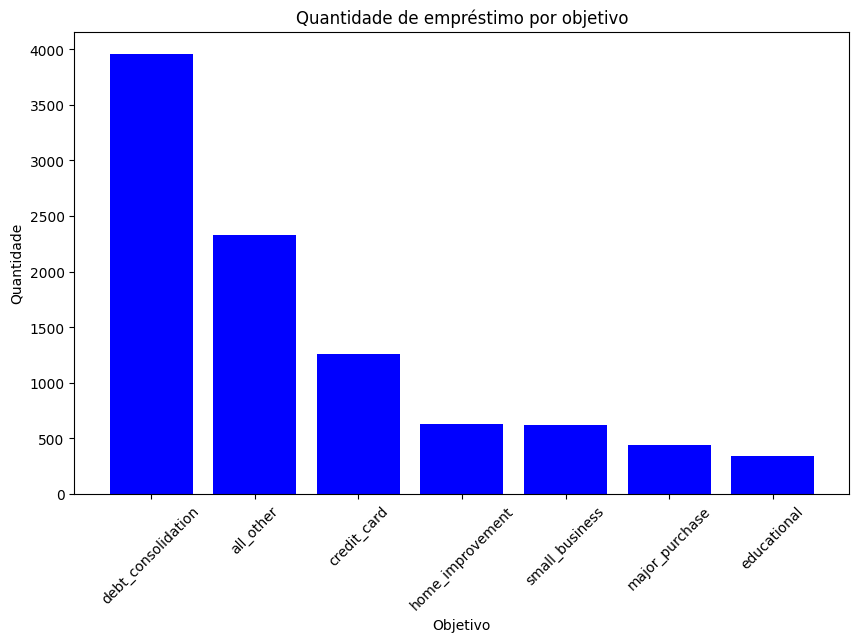

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(counts_purpose['purpose'], counts_purpose['count'], color='blue')
plt.xlabel('Objetivo')
plt.ylabel('Quantidade')
plt.title('Quantidade de empréstimo por objetivo')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-2176ce816e1f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: title={'center': 'Distribuição de empréstimo por pontuação'}, xlabel='fico', ylabel='Densidade'>

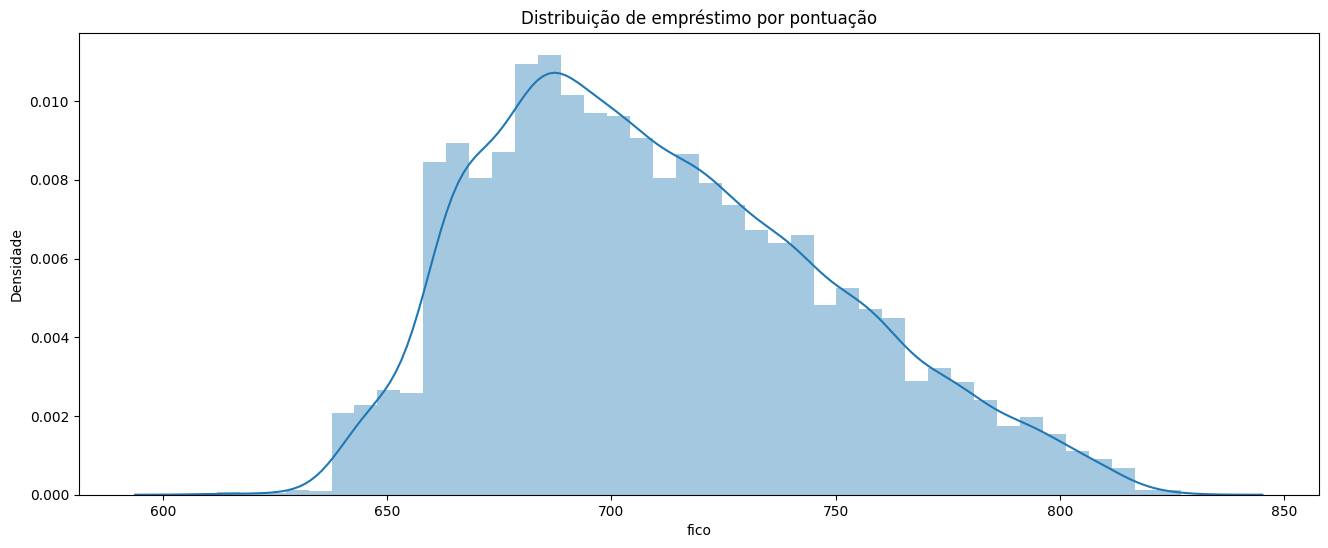

In [ ]:
plt.figure(figsize=(16,6))
plt.ylabel('Densidade')
plt.title('Distribuição de empréstimo por pontuação')
sns.distplot(df['fico'], kde=True)